# Exploitation of simulation algorithm results

In this example we are going to retrieve all the results proposed by probability simulation algorithms:

- the probability estimate
- the estimator variance
- the confidence interval
- the convergence graph of the estimator
- the stored input and output numerical samples
- importance factors

In [1]:
from __future__ import print_function
import openturns as ot

Create the joint distribution of the parameters.

In [2]:
distribution_R = ot.LogNormalMuSigma(300.0, 30.0, 0.0).getDistribution()
distribution_F = ot.Normal(75e3, 5e3)
marginals = [distribution_R, distribution_F]
distribution = ot.ComposedDistribution(marginals)

Create the model.

In [3]:
model = ot.SymbolicFunction(['R', 'F'], ['R-F/(pi_*100.0)'])

In [4]:
modelCallNumberBefore = model.getEvaluationCallsNumber()
modelGradientCallNumberBefore = model.getGradientCallsNumber()
modelHessianCallNumberBefore = model.getHessianCallsNumber()

To have access to the input and output samples after the simulation, activate the History mechanism.

In [5]:
model = ot.MemoizeFunction(model)

Remove all the values stored in the history mechanism. 
Care : it is done regardless the status of the History mechanism.

In [6]:
model.clearHistory()

Create the event whose probability we want to estimate.

In [7]:
vect = ot.RandomVector(distribution)
G = ot.CompositeRandomVector(model, vect)
event = ot.ThresholdEvent(G, ot.Less(), 0.0)

Create a Monte Carlo algorithm.

In [8]:
experiment = ot.MonteCarloExperiment()
algo = ot.ProbabilitySimulationAlgorithm(event, experiment)
algo.setMaximumCoefficientOfVariation(0.1)
algo.setMaximumStandardDeviation(0.001)
algo.setMaximumOuterSampling(int(1e4))

Define the HistoryStrategy to store the values of $P_n$ and $\sigma_n$ used ot draw the convergence graph. 
Compact strategy : N points

In [9]:
N = 1000
algo.setConvergenceStrategy(ot.Compact(N))
algo.run()

Retrieve result structure.

In [10]:
result = algo.getResult()

Display the simulation event probability.

In [11]:
result.getProbabilityEstimate()

0.030580075662042867

In [12]:
#  Criteria 3 : Display the Standard Deviation of the estimator
result.getStandardDeviation()

0.003057093060511293

Display the variance of the simulation probability estimator. 

In [13]:
result.getVarianceEstimate()

9.345817980626304e-06

In [14]:
#  Criteria 2 : Display the number of iterations of the simulation
result.getOuterSampling()

3172

In [15]:
# Display the total number of evaluations of the model
result.getOuterSampling() * result.getBlockSize()

3172

Save the number of calls to the model, its gradient and hessian done so far. 

In [16]:
modelCallNumberAfter = model.getEvaluationCallsNumber()
modelGradientCallNumberAfter = model.getGradientCallsNumber()
modelHessianCallNumberAfter = model.getHessianCallsNumber()

Display the number of iterations executed and the number of evaluations of the model. 

In [17]:
modelCallNumberAfter - modelCallNumberBefore

3172

Get the mean point in event  domain care : only for Monte Carlo and LHS sampling methods. 

In [18]:
result.getMeanPointInEventDomain()

class=Point name=Unnamed dimension=2 values=[245.843,80222]

Get the associated importance factors care : only for Monte Carlo and LHS sampling methods. 

In [19]:
result.getImportanceFactors()

class=PointWithDescription name=Unnamed dimension=2 description=[X0,X1] values=[0.776373,0.223627]

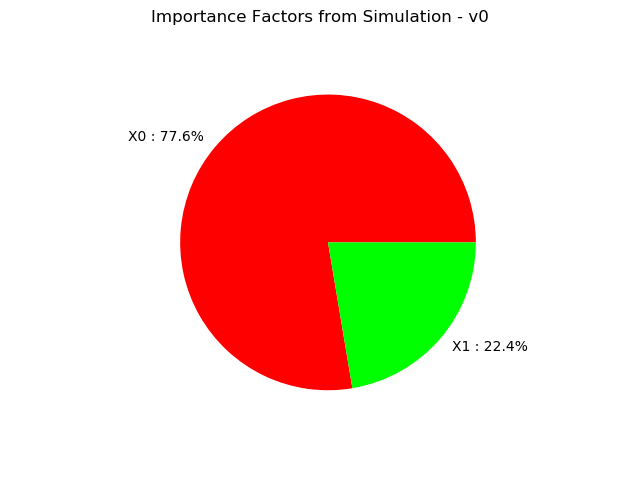

In [20]:
result.drawImportanceFactors()

Display the confidence interval length centered around the MonteCarlo probability. The confidence interval is 

$$
IC = [\tilde{p} - 0.5 \ell, \tilde{p} + 0.5 \ell]
$$

with level 0.95, where $\tilde{p}$ is the estimated probability and $\ell$ is the confidence interval length. 

In [21]:
probability = result.getProbabilityEstimate()
length95 = result.getConfidenceLength(0.95)
print("0.95 Confidence Interval length = ", length95)
print("IC at 0.95 = [", probability - 0.5*length95, "; ", probability + 0.5*length95, "]")

0.95 Confidence Interval length =  0.011983584591978923
IC at 0.95 = [ 0.024588283366053405 ;  0.03657186795803233 ]


Draw the convergence graph and the confidence interval of level alpha. By default, alpha = 0.95. 

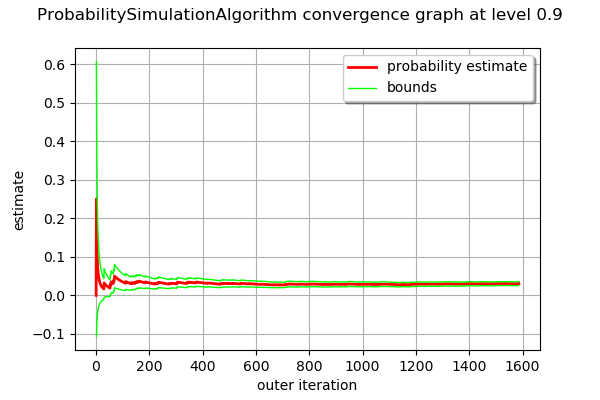

In [22]:
alpha = 0.90
algo.drawProbabilityConvergence(alpha)

Get the numerical samples of the input and output random vectors stored according to the History Strategy specified and used to evaluate the probability estimator and its variance. 

In [23]:
inputSampleStored = model.getInputHistory()
outputSampleStored = model.getOutputHistory()
inputSampleStored

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=3172 dimension=2 data=[[317.182,68669.1],[285.742,81027.4],[240.137,76750.2],...,[266.956,74830.1],[282.285,78480.2],[247.172,81708.2]]

Get the values of the estimator and its variance stored according to the History Strategy specified and used to draw the convergence graph.

In [24]:
estimator_probability_sample = algo.getConvergenceStrategy().getSample()[0]
estimator_variance_sample = algo.getConvergenceStrategy().getSample()[1]
print(estimator_probability_sample, estimator_variance_sample)

[0,-1] [0.25,0.046875]
